In [55]:
import argparse
import pandas as pd
import os,re
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.pylab as pl
import numpy as np

In [56]:
file ="../Physicell/output/new_results/fixed_cell_cycle/cells_volumes.csv"
df = pd.read_csv(file,index_col=0,float_precision='round_trip').sort_values(by=['dt']).reset_index(drop=True)
df['dt'] = df['dt']/60
df

FileNotFoundError: [Errno 2] No such file or directory: '../Physicell/output/new_results/fixed_cell_cycle/cells_volumes.csv'

In [ ]:
pc_group =  df.groupby(['dt'])
pc_group
for dt,idx in pc_group:
    if (dt == 48.0):
        print(idx)



      id         x          y         z  total_volume  current_phase    dt  \
189  3.0 -1.852361  -4.111051  6.310549    428.014768            4.0  48.0   
190  2.0  6.612672  -2.556908  3.038496    523.429881            4.0  48.0   
191  4.0 -4.461402 -12.183437  3.648319    428.014768            4.0  48.0   
192  0.0 -1.566400   1.990587 -1.965923    968.784282           10.0  48.0   

     radius  
189     NaN  
190     NaN  
191     NaN  
192     NaN  


/tmp/ipykernel_92618/58667105.py:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for dt,idx in pc_group:


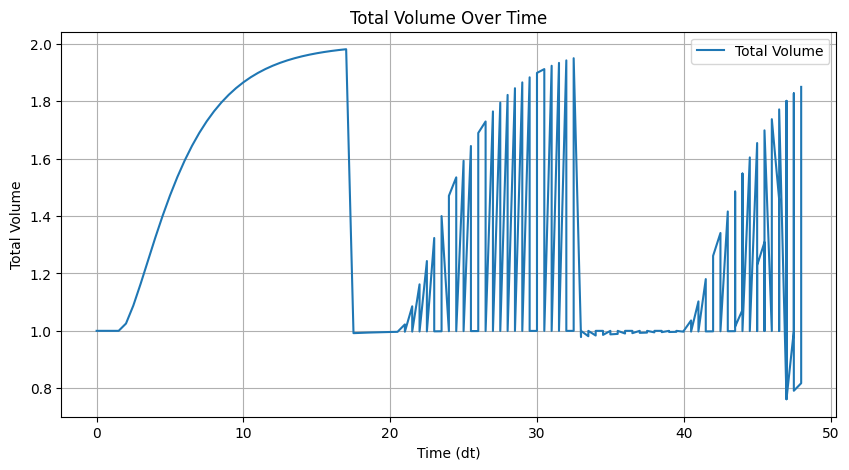

,id,x,y,z,total_volume,current_phase,dt,radius
0,0.0,0.000000,0.000000,0.000000,523.600000,4.0,0.0,NaN
1,0.0,0.000000,0.000000,0.000000,523.600000,4.0,0.5,NaN
2,0.0,0.000000,0.000000,0.000000,523.600000,4.0,1.0,NaN
3,0.0,0.000000,0.000000,0.000000,523.600000,4.0,1.5,NaN
4,0.0,0.000000,0.000000,0.000000,536.904550,10.0,2.0,NaN
...,...,...,...,...,...,...,...,...
188,3.0,-1.843622,-4.135367,6.247995,414.248591,4.0,47.5,NaN
189,3.0,-1.852361,-4.111051,6.310549,428.014768,4.0,48.0,NaN
190,2.0,6.612672,-2.556908,3.038496,523.429881,4.0,48.0,NaN
191,4.0,-4.461402,-12.183437,3.648319,428.014768,4.0,48.0,NaN


In [ ]:
# Total Volume vs. Time
plt.figure(figsize=(10, 5))
plt.plot(df['dt'], df['total_volume']/523.600000, label='Total Volume')
plt.xlabel('Time (dt)')
plt.ylabel('Total Volume')
plt.title('Total Volume Over Time')
plt.legend()
plt.grid(True)
plt.show()
df

In [ ]:
aggregated_data = df[df['id'] == 0.0].groupby('dt')['total_volume'].sum().reset_index()
# f = aggregated_data/523.600000
f =aggregated_data['total_volume']/523.600000
aggregated_data
# plt.plot(aggregated_data['dt'],aggregated_data['total_volume']/523.600000, label='Total Volume')

,dt,total_volume
0,0.0,523.600000
1,0.5,523.600000
2,1.0,523.600000
3,1.5,523.600000
4,2.0,536.904550
...,...,...
92,46.0,909.846206
93,46.5,927.701490
94,47.0,943.308759
95,47.5,956.924163


In [ ]:
file = '/home/thalia/BSC/github/Benchmarks/observatory_benchmark/multiscale_benchmark/2022_09_hackathon/Biodynamo/unit_test_cellcycle_stoch/new_results/cell-0.csv'
bd = pd.read_csv(file,header = None,index_col=3,names=['dt','volume',"id"])
bd
agg_bd = bd.groupby('dt')['volume'].sum().reset_index()
agg_bd

,dt,volume
0,0.01,523.599
1,0.02,523.599
2,0.03,523.599
3,0.04,523.599
4,0.05,523.599
...,...,...
4795,47.96,814.001
4796,47.97,814.664
4797,47.98,815.327
4798,47.99,815.988


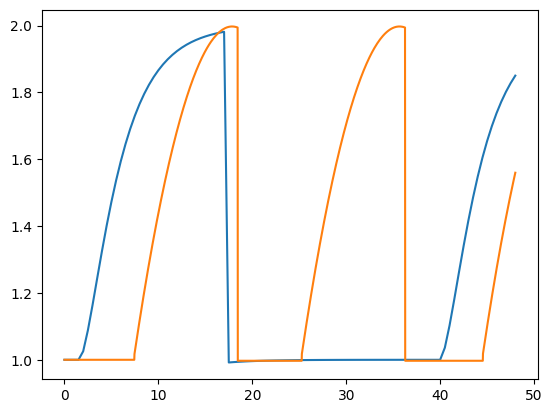

In [ ]:
plt.plot(aggregated_data['dt'],aggregated_data['total_volume']/523.600000, label='Total Volume')
plt.plot(agg_bd['dt'],agg_bd['volume']/523.599, label='Total Volume')